<a href="https://colab.research.google.com/github/nicocaggiano-creator/labo2025v/blob/main/src/CazaTalentos/CazaTalentos_v02_Binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cazatalentos
## buscando a  “La verdadera mejor encestadora”

## 1.Introduccion
Este notebook analiza de forma didáctica la razón por la que se produce el overfitting.

Ver los primeros cinco minutos de este video muy relacionado con lo que veremos
[Veritasium El Éxito ¿es Suerte o Trabajo Duro?](https://storage.googleapis.com/open-courses/austral2025-af91/labo1r/veritasium_success_paradox.html)

### 1.1 Motivacion

El siguiente desafío busca introducir el problema fundamental de la Ciencia de Datos que es el overfitting desde un ángulo distinto,  presentando los fenómenos del efecto del tamaño de la muestra,
<br> el conocido problema de las múltiples comparaciones  y “la maldición del ganador”.
<br>
<br> Aunque anecdóticametne está basado en algo deportivo, se extiende fácilmente  a :
*  la efectividad de acciones de marketing
*  el testeo de medicamentos
*  experimentos ciéntíficos https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1182327/
*  la comparación de modelos predictivos
*  la elección del mejor corte en un nodo de un árbol de decisión, etc
*  el examen único de **residencias médicas** de la República Argentina, y los incidentes presentados en el año 2025 https://www.infobae.com/salud/2025/08/08/examen-de-residencias-ninguno-de-los-117-medicos-que-se-presentaron-pudo-revalidar-su-nota-en-la-segunda-evaluacion/



### 1.2 Generalidades
Vari@s cazatalent@s de la gran ciudad van recorriendo pueblos en búsqueda de las mejores jugadoras de basket para tiros libres en la Liga Femenina de Basket.
<br>El procedimiento recomendado es el siguiente : un@ cazatalentos llega a un pueblo y va a la única cancha de basket del lugar donde la están esperando las adolescentes interesadas, las hace tirar tiros libres y elige a la mejor jugadora.
<br>Posteriormente a la elección del mejor jugadora, si le parece a la entrenadora de la gran ciudad, se llevará a la jugadora a que demuestre que tan buena es.

<br>A las jugadoras los podemos equiparar con modelos predictivos.


### 2 Definición del Problema

¿Qué metodología de las que se plantearán es la que propone a la jugadora con mayor probabilidad de superar el umbral del 80% de aciertos en la nueva prueba que se hará en la gran ciudad?
<br> Cada jugadora posee un “índice de enceste”, la cazatalentos no tiene forma de conocerlos; lo único que puede hacer la cazatalentos es hacer que las jugadoras hagan tiros libres, y medir los aciertos y no aciertos.

### 2.1  Caso fallido, una jugadora se quiere pasar de lista ...

La cazatalentos llega a una pequeña localidad a la que le han dicho que hay dos adolescentes cuyas habilidades debe testear.
<br> Una es super talentosa se llama Diana Taurasi  https://en.wikipedia.org/wiki/Diana_Taurasi, nosotros sabemos que tiene un “índice de enceste” del 0.85, es decir cada vez que hace un tiro libre su probabilidad de encestar es del 85%.   Si hace 100 tiros libres, en promedio encesta 85 veces,  a veces puede ser más, a veces menos, pero en promedio encesta 85 de 100.
<br> La otra es un auténtico desastre, a quien llamaremos  Miss X, y su índice de enceste es de 0.10.  Esto quiere decir que si hace 100  tiros libres, en promedio encesta 10.
<br> La cazatalentos NO tiene forma de conocer los valores de 0.85 y 0.10, solo puede hacerlas tirar y contar aciertos.

<br>La cazatalentos llega al gimnasio,  y solo se encuentra Diana, con lo cual le indica que comience a tirar.  Al tiro 10, Diana lleva 8 encestes y 2 no-enceste.
<br>En ese momento, llega con un andar cansino Miss X y las interrumpe :  ¿cuánto va Diana ? La cazatalentos le responde  8 de 10.  Miss X solicita permiso para tirar, tira una sola vez y acierta.
<br>Ahí mismo dice : “paren las rotativas, yo soy la clara ganadora de este torneo,  mi indice de acierto es del  100% y el de Diana es del 80% ,  la matemática es clara”.
<br>La cazatalentos monta en cólera y le dice :  pues usted joven solo ha realizado un tiro, ¿Si lo hubiera errado, aceptaría decir entonces que su indice de acierto es del 0%? Ciertamente no.
<br>Pues ahora, usted deberá seguir tirando hasta completar sus 10 tiros libres, y recién ahí compararé.


### 2.2 Segundo Caso

La cazatalentos tiene el siguiente algoritmo, hace que Diana Taurasi y Miss X hagan 10 tiros libres cada una, y elige a la ganadora de esos 10 tiros libres.
¿Garantiza este método que por lo menos el 99% de las veces elige a Diana Taurasi?

<br>¿La desastrosa Miss X puede llegar a encestar los 10 tiros libres?  <br>Efectivamente sí existe esa posibilidad, pero con una muy baja probabilidad, la probabilidad es de 0.10 ^10  =  1e-10
<br>El símbolo de  ^  significa  "elevado a la potencia de"
<br>
<br>¿Cual es la probabilidad que Miss X tire una sola vez y acierte este tiro? <br>Simplemente 0.1 , una en diez, con lo cual ha tenido mucha suerte en su primer tiro, pero no la va a poder mantener !

<br>¿La adolescente Diana Taurasi puede llegar a encestar los 10 tiros libres?  Efectivamente, su probabilidad es  0.85 ^10 = 0.1968744

En el lenguaje R la instrucción  runif(10)  genera un vector con 10 números aleatorios con distribución uniforme en el intervalo [0,1], por ejemplo

Ahora simulamos 10000 veces la estrategia de tirar 10 tiros libres y quedarse con la ganadora.

In [ ]:
missx_ganadora <- 0

for( i  in 1:10000 )
{
  aciertos_taurasi <- sum( runif(10) < 0.85 )
  aciertos_missx <- sum( runif(10) < 0.10 )

  if( aciertos_missx > aciertos_taurasi )  missx_ganadora <- missx_ganadora +1
}

cat( "Miss X gano un total de : ", missx_ganadora )

Miss X gano un total de :  0

Lo que da la cantidad de 0,  o sea que en 10000 veces, siempre ganó Diana Taurasi, con lo cual la estrategia de quedarse con el mejor de 10 tiros ha funcionado, para este obvio caso donde hay apenas dos jugadoras y hay una diferencia abismal entre ellas.

En este caso NO aparece el overfitting por ningún lado

### 2.3  Aparece el Overfitting

El cazatalentos llega ahora a un pueblo donde hay 100 jugadores los que son mucho más parejos entre sí desde el punto de vista del ratio de enceste.

Hay un jugador, que llamaremos jugador 1 que tiene un “índice de enceste” de  0.70
Los 99 jugadores restantes que llamaremos “el pelotón”  tienen los índices de enceste  { 0.501, 0.0502, 0.503, …, 0.599  }
Es decir el jugador 1 tiene 0.70 y el mejor jugador del pelotón tiene 0.599,  hay un poco más de 0.10 de diferencia.  La diferencia de 0.10 es significativa en basket.

¿Qué sucede con el algoritmo del cazatalentos de hacer tirar 10 tiros libres a cada uno de los jugadores y elegir al que más encestes logró ?


In [ ]:


set.seed( 500009 )

# calcula cuantos encestes logra una jugadora con indice de enceste prob
# haciendo qyt tiros libres

ftirar  <- function( prob, qty ){
  return( sum( runif(qty) < prob ) )
}


# defino las jugadoras
taurasi    <- 0.7
peloton    <- ( 501:599 ) / 1000
jugadoras  <- c( taurasi, peloton )





# hago que las 100 jugadoras tiren 10 veces cada una
mapply( ftirar, jugadoras, 10 )

primera_ganadora  <- 0

for( i in 1:10000 ){  # diez mil experimentos

  vaciertos  <- mapply( ftirar, jugadoras, 10 )  # 10 tiros libres cada jugadora

  mejor  <- which.max( vaciertos )
  if( mejor == 1 )  primera_ganadora  <- primera_ganadora + 1
}

cat("\n")
cat( "En los diez mil experimentos, se detecto correctamente a la mejor jugadora la cantidad de veces:", primera_ganadora )


[1] 7 9 4 6 2 6 2 5 6 6 3 3 6 5 4 7 6 7 5 9 6 2 6 4 6 4 6 3 2 2 9 5 7 4 6 6 4
 [38] 8 5 5 6 6 5 4 6 5 6 6 5 5 7 5 2 5 6 5 7 7 2 8 7 6 7 3 6 7 2 5 6 4 6 5 4 8
 [75] 5 5 7 6 5 8 6 6 6 5 6 6 6 8 4 6 8 7 6 7 8 3 6 7 3 7


En los diez mil experimentos, se detecto correctamente a la mejor jugadora la cantidad de veces: 1442

Aquí ya pasa algo asombroso, el overfitting en todo su esplendor.
Si hago tirar 10 tiros libres a cada uno de las 100 jugadoras, apenas 1450 veces de las 10000 este método  devuelve a la verdadera mejor, que es la jugadora con un índice de enceste de 0.70

Intuitivamente, lo que está sucediendo es que la inmensa mayoría de las veces, una de las 99 jugadoras del pelotón tiene mucha suerte y supera a la jugadora de 0.70, con lo cual se elige a una del pelotón y no a la verdadera mejor !  
<br>El tener 99 jugadoras en el pelotón hace que al ser tantas hay varias que tienen mala suerte, pero también hay varias con muy buena suerte, y la que tuvo más suerte supera a la verdadera mejor !


### 2.4 Nueva ronda

Ahora pasemos a ver aún algo más notable.
Tenemos a nuestra jugadora de 0.70, y a las 99 jugadoras del pelotón.
1.  Las hacemos tirar a cada una 10 tiros libres, y elegimos a la ganadora registrando cuántos aciertos tuvo
2.  solo a esa ganadora la hacemos tirar una nueva ronda de 10 tiros libres
3.  finalmente comparamos estos nuevos aciertos con los originales.


In [ ]:


set.seed( 102191 )

# calcula cuantos encestes logra una jugadora con indice de enceste prob
# haciendo qyt tiros libres

ftirar  <- function( prob, qty ){
  return( sum( runif(qty) < prob ) )
}


# defino los jugadoras
taurasi <-  0.7
peloton    <-  ( 501:599 ) / 1000
jugadoras  <-  c( taurasi, peloton )


cat( "Aciertos Ganadora", "\t", "Nueva Ronda", "\n")

for( i in 1:10 ){
  vaciertos  <- mapply( ftirar, jugadoras, 10 )  # cada jugadora tira 10 tiros libres
  mejor  <- which.max( vaciertos )
  aciertos_torneo  <- vaciertos[ mejor ]

  aciertos_segunda  <- ftirar( jugadoras[ mejor ], 10 )

  cat( aciertos_torneo, "\t\t\t", aciertos_segunda, "\n" )
}

Aciertos Ganadora 	 Nueva Ronda 
10 			 5 
8 			 7 
9 			 5 
9 			 7 
9 			 5 
9 			 7 
10 			 3 
9 			 5 
10 			 7 
8 			 2 


Lo que se observa en este caso es “La maldición del ganador”,
<br>la performance que la jugadora que logró más aciertos en la competencia general luego NO LA PUEDE MANTENER,
<br>en todos los casos vemos que en la nueva ronda de diez tiene menos aciertos que en la primera ronda de diez.
<br>La primera ronda  la jugadora que resultó ganadora fue debido a la suerte, y esa suerte ya no la acompaña para la segunda ronda de 10 tiros libres.

Relacionado con las competencias Kaggle, una forma de pensar esto es  "¿Cómo le va a ir al mejor modelo del Public Leaderboard en el Private?" ,  esta es la razón por la que los puntajes que vemos en el Private son inferiores al Public.
La primer ronda puede verse como quedarnos con el mejor modelo del Public Leaderboard, la nueva ronda es como le va a ese modelo en el Private Leaderboard.
<br>Elegir el mejor modelo del Public, suele ser una pésima estrategia.

### El overfitting en su plenitud

¿Cuándo es más extremo el efecto de “La maldición del ganador” ?
<br>Supongamos por un momento que ahora, en otro pueblo,  tenemos 100 jugadoras nuevas, todas con un “índice de enceste” de 0.70 ;  recordar que ese valor jamás es conocido por la cazatalentos.

<br>Ahora nos ponemos más estrictos, y las hacemos tirar 100 veces a cada una, elegimos a la ganadora, y solo a esa ganadora la hacemos tirar 100 nuevos tiros libres.
<br> Podemos pensarlo como que la cazatalentos se lleva a la mejor jugadora a la gran ciudad, le habla maravillas de ella a la entrenadora, y la entrenadora dice “probémosla a ver si es tan buena como decís, que haga 100 tiros libres aquí y ahora”

In [ ]:


set.seed( 102191 )

# calcula cuantos encestes logra una jugadora con indice de enceste prob
# que hace qyt tiros libres

ftirar  <- function( prob, qty ){
  return( sum( runif(qty) < prob ) )
}


# defino los jugadoras
jugadoras  <- rep( 0.7, 100 )




cat( "Aciertos Ganadora", "\t", "Nueva Ronda", "\n")
for( i in 1:10 ){
  vaciertos  <- mapply( ftirar, jugadoras, 100 )  # cada jugadora tira 100 tiros libres
  mejor  <- which.max( vaciertos )
  aciertos_torneo  <- vaciertos[ mejor ]

  aciertos_segunda  <- ftirar( jugadoras[ mejor ], 100 )

  cat( aciertos_torneo, "\t\t\t", aciertos_segunda, "\n" )
}

Aciertos Ganadora 	 Nueva Ronda 
82 			 68 
82 			 78 
83 			 78 
79 			 64 
82 			 69 
81 			 73 
78 			 71 
80 			 69 
82 			 61 
80 			 73 


Nuevamente vemos, que el puntaje alcanzado por la mejor jugadora cuando compitió contra las otras 99,  NO ES VUELTO A ALCANZAR  en la nueva ronda de 100 tiros libres que hace esa jugadora.
<br>Este efecto es exactamente el mismo que vemos cuando alguien se empecina en lograr en el Leaderboard Público el mayor puntaje de la clase,  le va muy bien en el Público, pero se derrumba catastróficamente en el Privado.
<br>Decimos que  “overfitió / sobreajustó el Leaderboard Publico”.

### 2.5 medida de la diferencia

Ahora nos preguntamos, en este caso, en promedio, cuanto más aciertos tiene la ganadora (debido a la suerte)  en la primera ronda  con respecto a la segunda ?


In [ ]:


set.seed( 102191 )

# calcula cuantos encestes logra una jugadora con indice de enceste prob
# que hace qyt tiros libres

ftirar  <- function( prob, qty ){
  return( sum( runif(qty) < prob ) )
}


# defino las jugadoras
jugadoras  <- rep( 0.7, 100 )




suma_diferencias <- 0

for( i in 1:10000 ){
  vaciertos  <- mapply( ftirar, jugadoras, 100 )  # cada jugador tira 100 tiros libres
  mejor  <- which.max( vaciertos )
  aciertos_torneo  <- vaciertos[ mejor ]

  aciertos_segunda  <- ftirar( jugadoras[mejor], 100 )

  suma_diferencias  <- suma_diferencias +  (aciertos_torneo - aciertos_segunda )
}


cat( "Diferencia promedio:",  suma_diferencias / 10000 )


Diferencia promedio: 11.0609

Exactamente este mismo efecto se da en el marketing digital.  Si en un A/B testing se prueban cien alternativas y se elige a la que tiene más efectividad, se observará que en un nuevo experimento disminuirá el rendimiento de esa alternativa.

También sucede si se prueban muchos medicamentos al mismo tiempo,   el que resulte más efectivo disminuirá su efectividad en la nueva prueba.

Este problema es llamado “El problema de las múltiples comparaciones”

### 2.6 una sola jugadora MUY buena

Sexto caso,  ¿cuándo se atenúa/desaparece  el overfitting?
Supongamos 99 jugadoras con un índice de enceste de 0.60   y  ahora sumamos a la adolescente Diana Taurasi con su superlativo índice de enceste del 0.85
Los hacemos tirar a todas 100 tiros libres, llevamos a la ganadora a la gran ciudad, y allí le contamos a la entrenadora de nuestra ganadora Diana Taurasi.

In [ ]:


set.seed( 102191 )

# calcula cuantos encestes logra una jugadora con indice de enceste prob
# que hace qyt tiros libres

ftirar  <- function( prob, qty ){
  return( sum( runif(qty) < prob ) )
}


# defino las jugadoras
taurasi    <- 0.85
peloton   <- rep( 0.6, 99 )  # jugadoras identicas
jugadoras <- c( taurasi, peloton )



cat( "Aciertos Ganadora", "\t", "Nueva Ronda", "\n")

for( i in 1:10 ){
  vaciertos  <- mapply( ftirar, jugadoras, 100 )  # cada jugadora tira 100 tiros libres
  mejor  <- which.max( vaciertos )
  aciertos_torneo  <- vaciertos[ mejor ]

  aciertos_segunda  <- ftirar( jugadoras[ mejor ], 100 )

  cat(aciertos_torneo, "\t\t\t", aciertos_segunda, "\n" )
}



Aciertos Ganadora 	 Nueva Ronda 
88 			 91 
85 			 86 
79 			 91 
86 			 81 
87 			 87 
84 			 84 
86 			 83 
87 			 86 
85 			 77 
92 			 83 


En este caso observamos dos cosas, en primer lugar SIEMPRE la ganadora del torneo fue Diana Taurasi, y en segundo  cuando tuvo que mostrar en la ciudad su performance, fue la misma que en el primer torneo.  
<br>Es tan buena Taurasi que le ganó a la que tuvo más suerte del pelotón, el efecto suerte no está afectando a Taurasi porque está sola, y gana por su superioridad, no por la suerte.

### 2.7 Efectos del tamaño de la ronda

La cazatalentos llega ahora a un pueblo donde hay 100 jugadoras las que son mucho más parejas entre sí desde el punto de vista del ratio de enceste.
Hay un jugadora, que llamaremos jugadora 1 que tiene un “índice de enceste” de  0.70 ,  es una jugadora buena pero dista mucho de ser Diana Taurasi, jamás estará en el "WNBA Hall of Fame".

Las 99 jugadoras restantes que llamaremos “el pelotón”  tienen los índices de enceste  { 0.501, 0.0502, 0.503, …, 0.599  }  Es decir la jugadora 1 tiene 0.70 y la mejor jugadora del pelotón tiene 0.599,  o sea hay un poco más de 0.10 de diferencia.  La diferencia de 0.10 es significativa en basket.

¿Cuántos tiros libres debe la cazatalentos pedirles que haga cada jugadora para que  si elige a la mejor jugadora tiene la certeza de llevarse a “la verdadero mejor” el 99% de los casos ?


In [ ]:
# intencionalmente la mejor jugadora va al final de la lista de jugadoras
# porque la funcion which.max() de R hace trampa
# si hay un empate ( dos máximos) se queda con la que esta primera en el vector


set.seed( 102191 )

# calcula cuantos encestes logra una jugadora con indice de enceste prob
# que hace qyt tiros libres

ftirar  <- function( prob, qty ){
  return( sum( runif(qty) < prob ) )
}


# defino los jugadoras
taurasi    <- 0.7
peloton    <- ( 501:599 ) / 1000
jugadoras  <- c( peloton, taurasi) # intencionalmente la mejor esta al final


for( tiros_libres in c(10, 20, 50, 100, 200, 300, 400, 415, 500, 600, 700, 1000 ) ){

  ultima_ganadora <- 0

  for( i in 1:10000 ) { # diez mil experimentos

    vaciertos  <- mapply( ftirar, jugadoras, tiros_libres )
    mejor  <- which.max( vaciertos )

    if( mejor == 100 )  ultima_ganadora  <- ultima_ganadora + 1
  }

  cat( tiros_libres, "\t", ultima_ganadora/10000, "\n" )
}



10 	 0.0299 
20 	 0.0868 
50 	 0.268 
100 	 0.5448 
200 	 0.8532 
300 	 0.9579 
400 	 0.9877 
415 	 0.9911 
500 	 0.9964 
600 	 0.9995 
700 	 0.9999 
1000 	 1 


Haciendo tirar 415 tiros libres a cada una de los 100 jugadoras,
<br> y quedándose con la ganadora de ese torneo,
<br> en el 99.10%   ( 0.9910 )  de los casos se está segura que esa es "la verdadera mejor".


## 3 Conclusiones

El overfitting aparece cuando se comparan muchas jugadoras (modelos predictivos)  muy parecidas entre sí.  
<br> En el modelado predictivo es la situación más común que se tengan modelos con similar poder predictivo ya que generalmente solo difieren apenas en valores de los hiperparámetros o algunas columnas nuevas con feature engineering.

Las jugadoras no son determinísticas, sino probabilísticas, con lo cual al comparar muchas parecidas la ganadora es quien además de su talento tuvo más suerte en ese torneo.  La jugadora ganadora ganó por mera suerte, y  NO puede sostener esa suerte en un nuevo torneo, por lo que el puntaje del primer torneo es mentiroso, no se sostiene en el nuevo torneo.

El overfitting se atenúa o puede llegar a desaparecer del todo, si en el torneo hay una jugadora ampliamente superior al resto. Esa jugadora SI mantiene su performance de un torneo al otro, ya que su puntaje en el primer torneo fue alto porque es realmente buena, porque no es el máximo de muchos parecidas a ella.

La forma de combatir el overfitting es hacer torneos de muchos tiros libres.
<br>Para estimar que tan buena es la jugadora ganadora de un torneo, hay que hacerla tirar nuevamente tiros libres.
<br>El secreto está en hacer más de un torneo.


## 4 Desafio Cazatalentos Ordenamiento

### 4.1 Enunciado

Se reúne la entrenadora  en la gran ciudad con algunas cazatalentos que visitaron regiones distintas.

Entrenadora:  Bienvenidas a todas, veo que cada una de ustedes ha traído la estadística de su candidata. Sin embargo, yo debo ordenarlas de mejor a peor, y no me alcanza con que dos de ustedes me digan que que sus candidatas encestaron 80/100, necesito que me relaten exactamente el procedimiento que han seguido para elegir a la mejor jugadora.

Cazatalentos 1:  Discúlpeme entrenadora, si dos de nosotras le presentamos casos que en distintos pueblos han encestado exactamente 80 de 100, probabilisticamente esas adolescentes son equivalentes. Es cierto que luego aquí en la gran ciudad el dia de la prueba una podrá encestar 77 de 100, la otra 83,  pero eso es la parte natural del random, ya sabemos que la distribución es binomial.  Ambas son equivalentes, no importa que pasó con el resto de las jugadoras de su pueblo.

Entrenadora: Estimada “Cazatalentos 1”  tú estas equivocada, no consideras El Problema de las Multiples Comparaciones; elegir cuales de esas adolescentes vendrán a la gran ciudad a ser evaluadas es mi decisión. Comienza tú contando detalladamente el proceso que has seguido.
4



**Cazatalentos 1**: Llegué a la localidad habían 100 adolescentes en el gimnasio, hice tirar a cada una 100 tiros, solo una obtuvo 80 aciertos, luego un par 79, otro par 78, y así descendían. La que logró 80 aciertos es mi candidata.


**Cazatalentos 2:** Llegué a una pequeña ciudad y habían 200 adolescentes en el gimnasio, hice tirar a cada una 100 tiros, solo una obtuvo 80 aciertos, seis 79,  cinco 78, y así descendían. La que logró 80 aciertos es mi candidata.

**Cazatalentos 3:** Yo poseo 25 años de experiencia como cazatalentos y tengo muy buena intuición  para detectar el talento. Llegué a un pueblo donde habían 100 adolescentes, me senté en las gradas del gimnasio y las observé detenidamente mientras precalentaban sin tirar al aro.  A los 10 minutos, me paro, y señalo a una de ellas y le digo :  'tú, la número 13, a tirar 100 tiros; el resto gracias por haber venido pero se pueden ir cada una a su casa”. Y ahí al tirar esos 100 tiros logró 80 aciertos y esa es mi candidata.

**Cazatalentos 4:** Llegué a minúsculo pueblo con un aro reglamentario en la pared de una escuela, habían solamente 2 adolescentes, hice tirar a cada una 100 tiros, una obtuvo 80 y la otra 75.

**Cazatalentos 5:** Le dice a la entrenadora : “fui a una localidad de 500 habitantes, había una sola adolescente interesada, la hice tirar 100 tiros libres, y encestó 80,  tengo una filmación con mi celular de los 100 tiros, sin edición ni cortes”
En realidad, esa adolescente es la sobrina de la cazatalentos, la hizo tirar 10 rondas de 100 tiros cada una, grabó todas, pero tramposamente solo trae la grabación de la mejor ronda a la entrenadora.
Los resultados obtenidos por su sobrina son


| ronda | Tiros | Encestes |
| ---: | ---: | ---: |
| 1 | 100 | 68 |
| 2 | 100 | 74 |
| 3 | 100 | 78 |
| 4 | 100 | 70 |
| 5 | 100 | 68 |
| 6 | 100 | 63 |
| 7 | 100 | 80 |
| 8 | 100 | 68 |
| 9 | 100 | 67 |
| 10 | 100 | 65 |


(esta deshonestidad de la Cazatalentos 5 no debería parecerle extraña ni causarle gracia, es exactamente lo mismo que elegir como submit final el que le fue mejor en el Public Leaderboard,  algo muy común entre l@s alumn@s ...)
<br>Por una persona espía en el pueblo, la entrenadora está al tanto de lo ocurrido y conoce la tabla anterior, usará dicha información para tomar la decisión, aunque no le dirá nada, por esta vez, a la cazatalentos.

**Cazatalentos 6:** Yo disiento con utilizar sesgos como lo hizo la Cazatalentos 3, creo que se deben dar oportunidades inesperadas. Camino al pueblo escuché en la radio los resultados de la quiniela matutina y el 43 fue el numero ganador.

Llegué al gimnasio, habia 100 adolescentes, les explique que iba a utilizar criterios objetivos y subjetivos para elegir a la ganadora.  Las hice tirar 100 tiros a todas,  sin embargo ya tenía la decisión tomada de antemano, elegí a la numero 43, quien hizo 79 encestes de 100 tiros.
Ni siquiera registré en mi tablet los encestes del resto, quería dar una oportunidad random a una de esas chicas.

**Cazatalentos 7:** Llegué a la localidad habían 100 adolescentes en el gimnasio, todo perfectamente organizado por la dirección, hice tirar a cada una 100 tiros, solo una obtuvo 80 aciertos, luego un par 79, otro par 78, y así descendían. La que logró 80 aciertos era hasta ese momento mi candidata.
<br> Estaba subiendo ya a mi automovil para retirarme, y llega corriendo una nueva adolescente. Me relata que vive en un pequeño paraje sin gimnasio a 60 kilómetros al norte, que tenía una cita con otra cazatalentos, la única adolescente de ese paraje, pero que por un terrible accidente de tránsito en un puente, la otra cazatalentos no pudo llegar a testearla, y le refirió que yo estaraía en este pueblo por lo que hacieno dedo llegó hasta aquí.
<br> Con un llamado corroboré su historia, y como estaba con tiempo, reingresé al gimnasio y le hice tirar 100 tiros libres, de los cuales encestó 79.
<br> Estoy presentando como mi candidata a esta adolescente de último momento de 79 encestes (y no la previa de 80).

### 4.2 Desafio

Podemos suponer que la supertalentosa Diana Taurasi con su “índice de enceste” del 0.85 es superior a todas las jugadoras evaluadas en los pueblos por las cazatalentos.

Desafío : ¿Si usted fuera la entrenadora, como ordena el valor esperado de encestes en una ronda de 100 tiros libres  a cada una de las candidatas propuestas por las cinco cazatalentos ?


donde   Ci  < Cj   sii   prob(  #Encestes Ci  <  #Encestes Cj    | 100 tiros cada uno )  >  0.5
es decir que, haciendo 100 tiros libres,  más de la mitad de las veces,  Ci va a lograr menos encestes que Cj

La entrenadora de la gran ciudad NO quiere traer a la elegida de cada cazatalentos y hacerlas tirar 100 tiros delante de ella para constatar cual logra más encestes en esa ronda. Ella quiere, con la información que le brindó cada cazatalentos sobre el procedimiento y los resultados, elegir la mejor encestadora.


### 4.3  Reglas del Desafio


*  Entrega
      * la entrega se realiza con un solo mensaje en Zulip canal #CazaTalentos
         * Ordenamiento,  por ejemplo     C3 <  C6 < C5 <  C7 < C1 < C4 < C2
         * Explicacion
      * Si necesitará apoyarse en scripts para alguna de las comparaciones
          * link a carpeta en GitHub
      * Podrá enviar varios mensajes, el único que tendrá valor será el último

*  Será muy valioso el intercambio de ideas en Zulip channel  **#laboIBA-CazaTalentos**  topic  **Intercambio de Ideas**, este desafío suele ser muy polémico.


In [ ]:
set.seed(500009)
library(tidyverse)

# Parámetros
n_iter <- 1e5
n_tiros <- 100
a0 <- 1; b0 <- 1

posterior_beta <- function(y, n, a0 = 1, b0 = 1, n_iter = 1e5) {
  rbeta(n_iter, a0 + y, b0 + n - y)
}

# C1: mejor de 100 pero observamos 80/100
p1 <- posterior_beta(80, 100, a0, b0, n_iter)

# C2: mejor de 200 pero observamos 80/100
p2 <- posterior_beta(80, 100, a0, b0, n_iter)

# C3: una sola, 80/100
p3 <- posterior_beta(80, 100, a0, b0, n_iter)

# C4: mejor de 2, observamos 80/100 de la elegida (el 75 del resto no modifica p* de la elegida)
p4 <- posterior_beta(80, 100, a0, b0, n_iter)

# C5: 10 rondas conocidas (701/1000)
p5 <- posterior_beta(701, 1000, a0, b0, n_iter)

# C6 y C7: una al azar con 79/100
p6 <- posterior_beta(79, 100, a0, b0, n_iter)
p7 <- posterior_beta(79, 100, a0, b0, n_iter)

# Predicción de encestes futuros en 100 tiros
sim_encestes <- function(p, n_tiros = 100) rbinom(length(p), n_tiros, p)

pred <- tibble(
  C1 = sim_encestes(p1),
  C2 = sim_encestes(p2),
  C3 = sim_encestes(p3),
  C4 = sim_encestes(p4),
  C5 = sim_encestes(p5),
  C6 = sim_encestes(p6),
  C7 = sim_encestes(p7)
)

# Matriz P(Ci < Cj)
nC <- ncol(pred)
res <- matrix(NA, nC, nC, dimnames = list(colnames(pred), colnames(pred)))
for (i in 1:nC) for (j in 1:nC) if (i != j) res[i, j] <- mean(pred[[i]] < pred[[j]])

# Esperados y ranking
esp <- colMeans(pred)
ranking <- tibble(Cazatalentos = names(esp), Esperado = esp) |> arrange(desc(Esperado))

print("Ranking esperado (mayor es mejor):"); print(ranking)
print("Matriz P(Ci < Cj):"); print(round(res, 3))


[1] "Ranking esperado (mayor es mejor):"
# A tibble: 7 × 2
  Cazatalentos Esperado
  <chr>           <dbl>
1 C1               79.4
2 C4               79.4
3 C2               79.4
4 C3               79.4
5 C7               78.4
6 C6               78.4
7 C5               70.1
[1] "Matriz P(Ci < Cj):"
      C1    C2    C3    C4    C5    C6    C7
C1    NA 0.473 0.474 0.475 0.094 0.426 0.426
C2 0.477    NA 0.475 0.474 0.095 0.426 0.426
C3 0.476 0.475    NA 0.477 0.094 0.426 0.427
C4 0.475 0.475 0.474    NA 0.094 0.425 0.427
C5 0.882 0.881 0.883 0.883    NA 0.851 0.852
C6 0.525 0.525 0.524 0.526 0.122    NA 0.476
C7 0.525 0.524 0.523 0.525 0.120 0.475    NA


In [ ]:
ajuste_seleccion <- function(m, observado, n_tiros = 100, n_iter = 1e6, # Use the global n_iter
                             a0 = 1, b0 = 1) {
  # Simula grupos de m jugadoras; condiciona a que el max observado sea 'observado'
  p_mat <- matrix(rbeta(n_iter * m, a0, b0), nrow = n_iter, ncol = m)
  Y_mat <- matrix(rbinom(n_iter * m, n_tiros, as.vector(p_mat)), nrow = n_iter, ncol = m)
  idx   <- max.col(Y_mat, ties.method = "first")              # índice de la mejor en cada grupo
  y_max <- Y_mat[cbind(1:n_iter, idx)]
  keep  <- which(y_max == observado)                          # condiciona en el max reportado
  if (length(keep) < 1000) stop("Muy pocos escenarios válidos; aumentá n_iter en ajuste_seleccion.")
  p_sel <- p_mat[cbind(keep, idx[keep])]
  sample(p_sel, n_iter, replace = TRUE)                       # remuestrea para devolver tamaño n_iter
}


--- Resumen por candidata (encestes en 100 tiros) ---
# A tibble: 7 × 6
  Cazatalentos media    sd  p2.5   p50 p97.5
  <chr>        <dbl> <dbl> <dbl> <dbl> <dbl>
1 C1            79.4  5.68    68    80    90
2 C4            79.4  5.68    68    80    90
3 C2            79.4  5.66    68    80    90
4 C3            79.4  5.66    68    80    90
5 C7            78.4  5.77    66    79    89
6 C6            78.4  5.79    66    79    89
7 C5            70.1  4.82    60    70    79


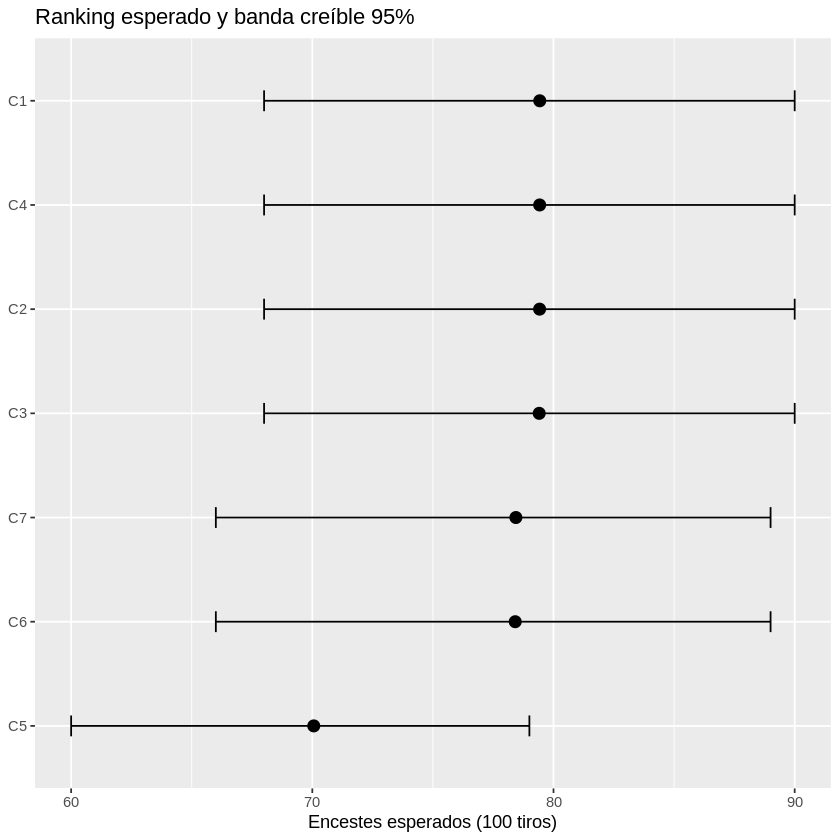

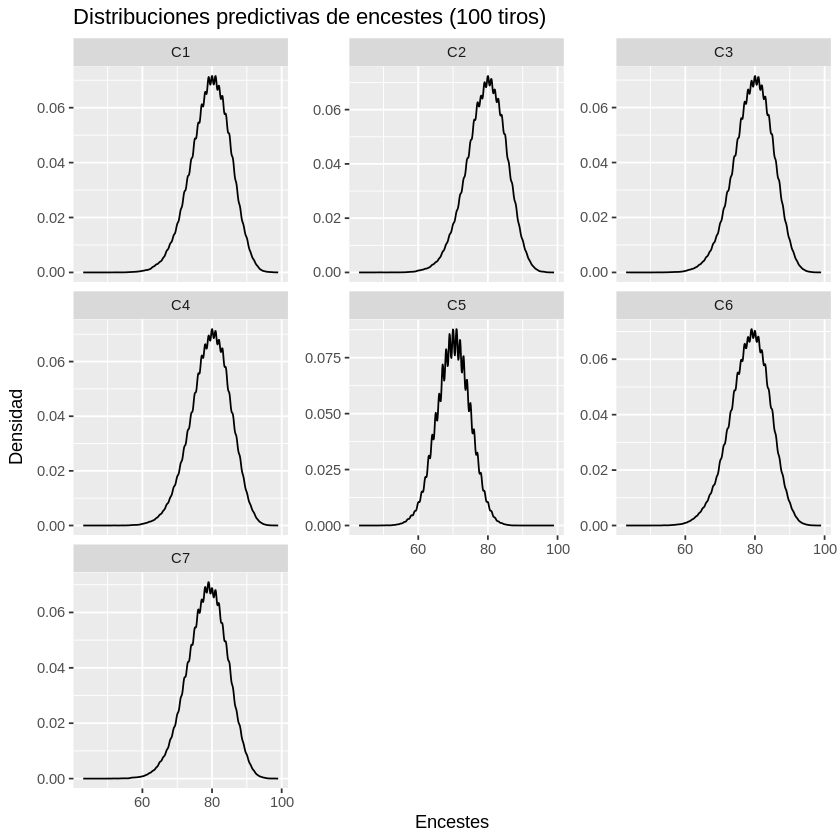

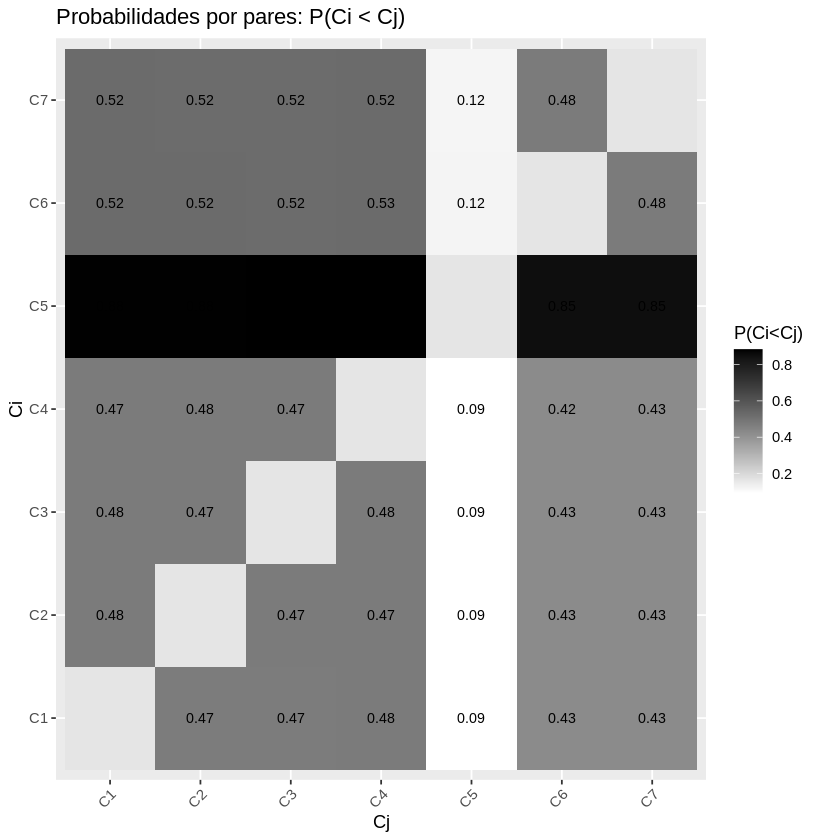

In [ ]:
#Tablas
library(ggplot2)
library(tidyr)
library(dplyr)

# Tabla resumen por candidata: media, sd y banda creíble 95%
summary_tbl <- pred %>%
  pivot_longer(everything(), names_to = "Cazatalentos", values_to = "encestes") %>%
  group_by(Cazatalentos) %>%
  summarise(
    media = mean(encestes),
    sd = sd(encestes),
    p2.5 = quantile(encestes, 0.025),
    p50  = quantile(encestes, 0.50),
    p97.5 = quantile(encestes, 0.975),
    .groups = "drop"
  ) %>%
  arrange(desc(media))

cat("\n--- Resumen por candidata (encestes en 100 tiros) ---\n")
print(summary_tbl)

# Ranking con bandas creíbles 95%
ggplot(summary_tbl, aes(x = reorder(Cazatalentos, media), y = media)) +
  geom_point(size = 3) +
  geom_errorbar(aes(ymin = p2.5, ymax = p97.5), width = 0.2) +
  coord_flip() +
  labs(
    title = "Ranking esperado y banda creíble 95%",
    x = NULL, y = "Encestes esperados (100 tiros)"
  )

# Distribuciones predictivas por candidata
pred_long <- pred %>%
  pivot_longer(everything(), names_to = "Cazatalentos", values_to = "encestes")

ggplot(pred_long, aes(x = encestes)) +
  geom_density(adjust = 1) +
  facet_wrap(~ Cazatalentos, ncol = 3, scales = "free_y") +
  labs(
    title = "Distribuciones predictivas de encestes (100 tiros)",
    x = "Encestes", y = "Densidad"
  )

# Heatmap de probabilidades pareadas P(Ci < Cj)
res_df <- as.data.frame(res) |>
  tibble::rownames_to_column("Ci") |>
  pivot_longer(-Ci, names_to = "Cj", values_to = "prob")

ggplot(res_df, aes(Cj, Ci, fill = prob)) +
  geom_tile() +
  geom_text(aes(label = ifelse(is.na(prob), "", sprintf("%.2f", prob))), size = 3) +
  scale_fill_gradient(low = "white", high = "black", na.value = "grey90") +
  labs(
    title = "Probabilidades por pares: P(Ci < Cj)",
    x = "Cj", y = "Ci", fill = "P(Ci<Cj)"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
